In [40]:
from PIL import Image
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import numpy as np

# Constants

In [41]:
ROOT_DIRECTORY = "../"
IMAGE_NAME = "rendition_6266.jpg"

# Find all the images that match in the random datasets

### class to facilitate easier lookup

In [42]:
class Dataset:
    def __init__(self):
        pass

In [43]:
command = ["find", ROOT_DIRECTORY, "-name", IMAGE_NAME]
result = subprocess.run(
    command,
    capture_output=True,
    text=True,
    check=True
)

std_out = result.stdout
std_err = result.stderr

if std_err:
    print(f"STDERR:\n{std_err}")

image_paths = std_out.splitlines()
    

In [44]:
def join_dataframes(rng_method):
    ellipse_props = pd.read_csv(f"../data/null_datasets/{rng_method}/{rng_method}_region_props.csv")
    rotation_props = pd.read_csv(f"../data/null_datasets/{rng_method}/rotation_data.csv")
    rotation_props['image'] = rotation_props["KID_IDFrameKey"].apply(lambda x: f"rendition_{x}.jpg")
    full_dataframe = pd.merge(rotation_props, ellipse_props, on='image')
    return full_dataframe

In [45]:
full_philox = join_dataframes("PHILOX")
full_philox.head()

,KID_IDFrameKey,Euler_X,Euler_Y,Euler_Z,Object,RNG_method,image,area,centroid_x,centroid_y,axis_major_length,axis_minor_length,axis_ratio_minor_to_major,orientation_radians
0,0,54.928246,-7.050988,-6.160295,CameraNovel,PHILOX,rendition_0.jpg,13438,397.515478,292.305775,155.439710,115.763042,0.744746,-0.012135
1,1,-149.755669,-125.054396,-60.918645,HighChairNovel,PHILOX,rendition_1.jpg,11230,391.728317,295.905610,218.206215,97.717575,0.447822,0.586492
2,2,149.734503,-115.618892,6.187812,TrainNovel,PHILOX,rendition_2.jpg,14069,405.176772,306.684839,167.142148,110.376158,0.660373,-0.130349
3,3,93.343079,-153.558849,-42.971346,ShovelNovel,PHILOX,rendition_3.jpg,18550,408.289057,294.208086,274.560144,93.623960,0.340996,0.817898
4,4,40.487199,107.198690,-40.897869,CameraNovel,PHILOX,rendition_4.jpg,11300,409.324779,286.665929,132.554690,113.857902,0.858950,-1.293922


In [48]:
def extract_relevant_vals(dataframe, image):
    row = dataframe.loc[dataframe['image'] == image].iloc[0]
    x = row['Euler_X']
    y = row['Euler_Y']
    z = row['Euler_Z']
    toy = row["Object"]
    area = row["area"]
    angle = np.rad2deg(row['orientation_radians'])
    return f"x:{x:.2f}, y:{y:.2f}, z:{z:.2f}\narea:{area}, toy:{toy}\nangle:{angle:.2f}"

/tmp/ipykernel_1356/1313857460.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


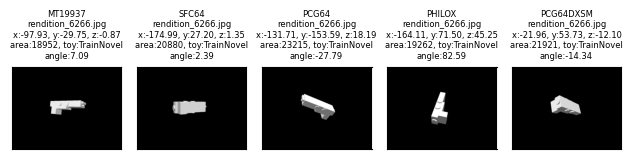

In [49]:
fig, ax = plt.subplots(1, len(image_paths))
for i, path in enumerate(image_paths):
    img = Image.open(path)
    _, _, _, rng_method, _, file_name = path.split("/")
    full_df = join_dataframes(rng_method)
    stat_string = extract_relevant_vals(full_df, file_name)
    ax[i].imshow(img)
    ax[i].set_title(f"{rng_method}\n{file_name}\n{stat_string}", fontsize=6)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

fig.tight_layout()
fig.show()

# Display each image